In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("mulrgdataset.csv")
data=data.drop(columns="State")
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [9]:
#mul regression  matrix formula
#to calculate coeff of beta matrix=inv(Xt*X)*(Xt)*Y
#generally the error matrix is not included
X=data.drop(columns="Profit")
Y=data['Profit']
Xt=X.transpose()
a=np.matmul(Xt,X)
a=np.linalg.inv(a)
a=np.matmul(a,Xt)
d=np.matmul(a,Y)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_18320\1673359369.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  a=np.matmul(Xt,X)


191792.06

In [14]:
def predict(a,b,B):
    y=B[2]+B[1]*a+B[0]*b
    return y
a=float(input("enter spend"))
b=float(input("enter administration"))
print("profit is ",predict(a,b,d))


enter spend100000
enter administration100000
profit is  104564.81796449906


In [19]:
dev=0
for i in range(50):
    dev+=(predict(X.iloc[i,0],X.iloc[i,1],d)-Y[i])
abs(dev)/50
#per obs there is an error of -734.6 deviation

734.6689088782913

In [49]:
error=[]
for i in range(50):
    error.append(predict(X.iloc[i,0],X.iloc[i,1],d))
deviation=abs(sum(error))/50

e=r2_score(Y,error)
e

0.44769311546962376

math way of r2


In [62]:
#math way of calculating r2 value
#R2= 1- sigma e1^2/ sigma e2^2
#e1=predicted-actual
#e2=actual-mean
e1=[]
e2=[]
for i in range(50):
    e1.append((predict(X.iloc[i,0],X.iloc[i,1],d)-Y[i])**2)
    e2.append((Y[i]-sum(Y)/len(Y))**2)
rscore=1-sum(e1)/sum(e2)
rscore

0.44769311546962387

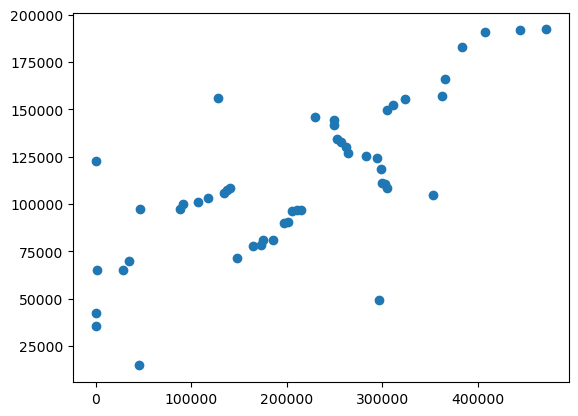

In [43]:
mpl.scatter(X.iloc[:,2],Y)